### Step 0 - import libraries

In [1]:
%matplotlib inline

# data wrangling & visualizations
import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import seaborn             as sns
import glob

# models
import xgboost             as xgb

'''
from sklearn.ensemble        import RandomForestRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import Ridge
from sklearn.linear_model    import Lasso
from sklearn.ensemble        import GradientBoostingRegressor
from lightgbm                import LGBMRegressor
from catboost                import CatBoostRegressor
from sklearn.linear_model    import SGDRegressor
from sklearn.kernel_ridge    import KernelRidge
from sklearn.linear_model    import ElasticNet
'''
from sklearn.base            import BaseEstimator
from sklearn.linear_model    import LogisticRegression
from sklearn                 import model_selection, naive_bayes, svm
from xgboost                 import XGBClassifier
from sklearn.naive_bayes     import MultinomialNB

# preprocessing & feature engineering
from sklearn.model_selection import train_test_split
from sklearn.compose         import ColumnTransformer
from sklearn.preprocessing   import FunctionTransformer
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import OneHotEncoder
from sklearn.impute          import SimpleImputer
from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition   import PCA

# validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics         import accuracy_score, precision_score, recall_score, balanced_accuracy_score

# warning & errors
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# specific lbraries and packages for text analysis
import nltk
nltk.download('omw-1.4')
nltk.download("wordnet")  
# only done once! we have to download the WordNet database locally
from nltk.tokenize                   import TreebankWordTokenizer 
# very good tokenizer for english, considers sentence structure
from nltk.stem                       import WordNetLemmatizer
#nltk.download('stopwords')
from nltk.corpus                     import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer   

STOPWORDS = stopwords.words('english')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/florianriemann/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/florianriemann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Step 1 - read data

  - List the data you need and how much you need.

  - Find and document where you can get the data.

  - Check how much space it will take.

  - Check legal obligations, and get authorizations if necessary.

  - Get access authorizations.

  - Create a workspace (with enough storage space).

  - Get the data.

  - Convert the data to a format you can easily manipulate (without changing the data itself).

  - Ensure sensitive information is deleted or protected (e.g. anonymized).

  - Check the size and type of data (time series, sample, geographical, etc.).

  - Sample a test set, put it aside, and never look at it (no data snooping!).

**Bob Marley corpus**

In [2]:
# define work directory
path_dir = '/home/florianriemann/data_science_portfolio/boot_camp/data/bob_marley/' 

# define list of files to access in a specific directory
txt_file_list  =  glob.glob(path_dir + '//*.txt')

# define list to hold all lines
BOBMARLEY_CORPUS = []

# read through all files and append content to the list of lists
for file in txt_file_list:
    with open (file, 'rb') as f:
        s_text_list = f.read().decode('ISO-8859-1') 
        BOBMARLEY_CORPUS.append(s_text_list)

**Elvis Presley corpus**

In [3]:
# define work directory
path_dir = '/home/florianriemann/data_science_portfolio/boot_camp/data/elvis_presley/'

# define list of files to access in a specific directory
txt_file_list  =  glob.glob(path_dir + '//*.txt')

# define list to hold all lines
ELVISPRESLEY_CORPUS = []

# read through all files and append content to the list of lists
for file in txt_file_list:
    with open (file, 'r') as f:
        # s_text_list = f.readlines()
        s_text_list = f.read()
        ELVISPRESLEY_CORPUS.append(s_text_list)

In [4]:
# corpus
CORPUS = BOBMARLEY_CORPUS + ELVISPRESLEY_CORPUS

# labels
l1,l2 = len(BOBMARLEY_CORPUS), len(ELVISPRESLEY_CORPUS)
LABELS = [f"bobmarley_{i}" for i in range(l1)] + [f"elvispresley_{i}" for i in range(l2)] 

In [5]:
CORPUS

["One good thing about music, when it hits ya \r\r\n(You feel no pain)\r\r\nWo-wo-wo, I say\r\r\nOne good thing about music, when it hits ya\r\r\n(you feel no pain)\r\r\nHit me with music, yeah, hit me with music now!\r\r\n\r\r\nThis is (Trench Town Rock) don't watch that\r\r\n(Trench Town Rock) big fish or sprat now\r\r\n(Trench Town Rock) you reap what you sow\r\r\n(Trench Town Rock) and only Jah-Jah know\r\r\n(Trench Town Rock) I never turn my back\r\r\n(Trench Town Rock) I give the slum a try\r\r\n(Trench Town Rock) I never let the children cry\r\r\n(Trench Town Rock) 'cause you got to tell Jah-Jah why\r\r\n(Groovin') It's Kingston twelve\r\r\n(Groovin') It's Kingston twelve\r\r\n(Groovin') It's Kingston twelve, now\r\r\n(Groovin') It's Kingston twelve\r\r\n(No want you fe galang so) oh no!\r\r\n(No want you fe galang so) scaba-dip, scaba\r\r\n(You want come cold I up) scaba-diba-dip, scaba-dip, scaba-dip\r\r\n(But you can't come cold I up)\r\r\nWo-wo-wo, I'm a groover\r\r\nAnd the

In [6]:
LABELS

['bobmarley_0',
 'bobmarley_1',
 'bobmarley_2',
 'bobmarley_3',
 'bobmarley_4',
 'bobmarley_5',
 'bobmarley_6',
 'bobmarley_7',
 'bobmarley_8',
 'bobmarley_9',
 'bobmarley_10',
 'bobmarley_11',
 'bobmarley_12',
 'bobmarley_13',
 'bobmarley_14',
 'bobmarley_15',
 'bobmarley_16',
 'bobmarley_17',
 'bobmarley_18',
 'bobmarley_19',
 'bobmarley_20',
 'bobmarley_21',
 'bobmarley_22',
 'bobmarley_23',
 'bobmarley_24',
 'bobmarley_25',
 'bobmarley_26',
 'bobmarley_27',
 'bobmarley_28',
 'bobmarley_29',
 'bobmarley_30',
 'bobmarley_31',
 'bobmarley_32',
 'bobmarley_33',
 'bobmarley_34',
 'bobmarley_35',
 'bobmarley_36',
 'bobmarley_37',
 'bobmarley_38',
 'bobmarley_39',
 'bobmarley_40',
 'bobmarley_41',
 'bobmarley_42',
 'bobmarley_43',
 'bobmarley_44',
 'bobmarley_45',
 'bobmarley_46',
 'bobmarley_47',
 'bobmarley_48',
 'bobmarley_49',
 'bobmarley_50',
 'bobmarley_51',
 'bobmarley_52',
 'bobmarley_53',
 'bobmarley_54',
 'bobmarley_55',
 'bobmarley_56',
 'bobmarley_57',
 'bobmarley_58',
 'bobma

In [7]:
df = pd.DataFrame(CORPUS, index=LABELS)

In [8]:
df.rename(columns={0:'lyrics'}, inplace=True)

In [9]:
df['artist'] = df.index

In [10]:
df['artist'] = df['artist'].fillna('').astype(str).str.replace(r'[^A-Za-z ]', '', regex=True).replace('', np.nan, regex=False)

In [11]:
X = df.drop('artist', axis=1)
y = df['artist']

In [12]:
y.value_counts()

elvispresley    115
bobmarley       109
Name: artist, dtype: int64

### Step 2 - train-test-split

<hr style="border:2px solid black">

*Don't get biased by any stretch of the imagination. Do the train-test-split as early as possible!*

<hr style="border:2px solid black">

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train_corpus = list(X_train['lyrics'])
y_train_labels = list(y_train)

X_test_corpus  = list(X_test['lyrics'])
y_test_labels  = list(y_test)

X_corpus       = list(X['lyrics'])
y_labels       = list(y)

### Step 3 - exploratory data analysis

#### Step 3.0 - workflow

  - Create a copy of the data exploration (sampling it down to a manageble size if necessary).

  - Create a notebook to keep a record of your data exploration.

  - Study each attribute and its characteristics:

    - Name
    - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
    - % of missing values
    - Noisiness and type of noise (stoxastoc, outliers, rounding errors, etc.)
    - Possibly useful for the task?
    - Type of distribution (Gaussian, uniform, logarithmic, etc.)
  - For supervised learning tasks, identify target attribute(s).

  - Visualize the data.

  - Study the correlation between attributes.

  - Study how you would solve the problem manually.

  - Identify the promising transformations you may want to apply.

  - Identify extra data that would be useful.

  - Document what you have learned.

#### Step 3.1 - general overview

#### Step 3.2 - descriptive statistics

#### Step 3.3 - observe some features in more detail

### **Conclusion from the EDA**

<hr style="border:2px solid black">

    - ....
<hr style="border:2px solid black">

### Step 4 - cleaning & scaling

   - *Fix or remove outliers (otional).*
   - *Fill in missing values (e.g. with zero, mean, median ...) or drop their rows (or columns).*
   - *Standadize or nomalize features*

#### Step 4.1 - impute missing values

#### Step 4.2 - scaling

#### Step 4.3 - interpolation

#### Step 4.4 - remove duplicates and outliers

### Step 5 - feature engineering

   - *Discretize continious features.*
   - *Decompose features (e.g. categorical, date/time, etc.).*
   - *Add promising transformations of features (e.g. log(x), sqrt(x), x^2, etc.).*
   - *Aggregate features into promising new features.*

#### Step 5.1 - feature extraction, decomposition and transformation

In [15]:
# lower case all words in lyrics
def lower_casetor(CORPUS):

    CORPUS = [s.lower() for s in CORPUS]
    
    return CORPUS

#### Step 5.2 - encoding of categorical features

In [16]:
# tokenize and lemmatize
def token_and_lemmatiziator(CORPUS):
    tokenizer  = TreebankWordTokenizer()
    lemmatizer = WordNetLemmatizer()

    CLEAN_CORPUS = [] # this is where my clean corpus will end 

    for lyr in CORPUS:
        tokens    = tokenizer.tokenize(text = lyr)
        clean_doc = " ".join(lemmatizer.lemmatize(token) for token in tokens)
        CLEAN_CORPUS.append(clean_doc)
    
    CORPUS = CLEAN_CORPUS
    
    return CORPUS

#### Step 5.3 - discretizing of continious features

#### Step 5.4 - drop features

#### Step 5.5 - sampling strategy in case of imbalanced data

#### Step 5.6 - implement polynomials

### Step 6 - baseline model

#### Step 6.1 - create pipeline for the baseline model 

##### Step 6.1.1 - function and column transformer

In [17]:
lower_case_transformer           = FunctionTransformer(lower_casetor)
token_and_lemmatizer_transformer = FunctionTransformer(token_and_lemmatiziator)
vectorizer                       = TfidfVectorizer(stop_words = STOPWORDS)

##### Step 6.1.2 - set up pipeline with estimators

In [18]:
class DummyEstimator(BaseEstimator):
    def fit(self):   pass
    def score(self): pass

In [19]:
pipeline = Pipeline([
                    # my function transformers
                     ( 'lower_casor'           , lower_case_transformer                     ),
                     ( 'tok_and_lemma'         , token_and_lemmatizer_transformer           ),
                    # my column transformers
                     ( 'vector'                , vectorizer                                 ),
                    #( 'princoman'             , PCA(n_components=0.99, svd_solver = 'full')),
                    # my estimator ...
                     ( 'classifier'            , DummyEstimator()                 )
])

In [20]:
pipeline.named_steps

{'lower_casor': FunctionTransformer(func=<function lower_casetor at 0x7faac2610a60>),
 'tok_and_lemma': FunctionTransformer(func=<function token_and_lemmatiziator at 0x7faac2610790>),
 'vector': TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                             'ourselves', 'you', "you're", "you've", "you'll",
                             "you'd", 'your', 'yours', 'yourself', 'yourselves',
                             'he', 'him', 'his', 'himself', 'she', "she's",
                             'her', 'hers', 'herself', 'it', "it's", 'its',
                             'itself', ...]),
 'classifier': DummyEstimator()}

In [21]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'lower_casor', 'tok_and_lemma', 'vector', 'classifier', 'lower_casor__accept_sparse', 'lower_casor__check_inverse', 'lower_casor__feature_names_out', 'lower_casor__func', 'lower_casor__inv_kw_args', 'lower_casor__inverse_func', 'lower_casor__kw_args', 'lower_casor__validate', 'tok_and_lemma__accept_sparse', 'tok_and_lemma__check_inverse', 'tok_and_lemma__feature_names_out', 'tok_and_lemma__func', 'tok_and_lemma__inv_kw_args', 'tok_and_lemma__inverse_func', 'tok_and_lemma__kw_args', 'tok_and_lemma__validate', 'vector__analyzer', 'vector__binary', 'vector__decode_error', 'vector__dtype', 'vector__encoding', 'vector__input', 'vector__lowercase', 'vector__max_df', 'vector__max_features', 'vector__min_df', 'vector__ngram_range', 'vector__norm', 'vector__preprocessor', 'vector__smooth_idf', 'vector__stop_words', 'vector__strip_accents', 'vector__sublinear_tf', 'vector__token_pattern', 'vector__tokenizer', 'vector__use_idf', 'vector__vocabulary'])

##### Step 6.1.3 - define the hyperparameter grid

In [22]:
hyperparam_grid = [
                  {
                    'classifier'                  : [LogisticRegression()],
                    'classifier__penalty'         : ['l1', 'l2','elasticnet']
                
                  },
                  {
                    'classifier'                  : [MultinomialNB()],
                    'classifier__alpha'           : [1.0]
                  },
                  {
                    'classifier'                  : [svm.SVC()],
                    'classifier__kernel'          : ['linear']
                  },
                  {
                    'classifier'                  : [XGBClassifier()],
                    'classifier__n_estimators'    : [50, 100, 200],
                    'classifier__learning_rate'   : [0.05, 0.1, 0.2]
                      
                      
                  }
]

##### Step 6.1.4 - set up the grid search CV

In [23]:
gs = GridSearchCV(
                    estimator  = pipeline        , 
                    param_grid = hyperparam_grid ,
                    cv         = 5               ,                                         
                    scoring    = 'accuracy'
                )

#### Step 6.2 - run the baseline model

In [24]:
grid_search = gs.fit(X_train_corpus, y_train_labels)

/home/florianriemann/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/florianriemann/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/florianriemann/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/florianriemann/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091

#### Step 6.3 - evaluate the model

In [25]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score').head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       0.148073      0.001373         0.036020        0.001013   
3       0.144596      0.000999         0.035973        0.001109   
4       0.150348      0.000666         0.037314        0.001063   
0       0.336051      0.382116         0.000000        0.000000   
2       0.141911      0.001568         0.000000        0.000000   

       param_classifier param_classifier__penalty param_classifier__alpha  \
1  LogisticRegression()                        l2                     NaN   
3       MultinomialNB()                       NaN                     1.0   
4                 SVC()                       NaN                     NaN   
0  LogisticRegression()                        l1                     NaN   
2  LogisticRegression()                elasticnet                     NaN   

  param_classifier__kernel param_classifier__learning_rate  \
1                      NaN                             NaN   
3                      NaN                             NaN   
4                   linear                             NaN   
0                      NaN                             NaN   
2                      NaN                             NaN   

  param_classifier__n_estimators  \
1                            NaN   
3                            NaN   
4                            NaN   
0                            NaN   
2                            NaN   

                                              params  split0_test_score  \
1  {'classifier': LogisticRegression(), 'classifi...           0.833333   
3  {'classifier': MultinomialNB(), 'classifier__a...           0.805556   
4  {'classifier': SVC(), 'classifier__kernel': 'l...           0.777778   
0  {'classifier': LogisticRegression(), 'classifi...                NaN   
2  {'classifier': LogisticRegression(), 'classifi...                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
1           0.777778           0.722222           0.833333           0.828571   
3           0.777778           0.722222           0.805556           0.857143   
4           0.777778           0.750000           0.805556           0.857143   
0                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  
1         0.799048        0.043766                1  
3         0.793651        0.043974                2  
4         0.793651        0.036283                3  
0              NaN             NaN                4  
2              NaN             NaN                5

In [26]:
best_pipe = gs.best_estimator_

In [27]:
best_pipe

Pipeline(steps=[('lower_casor',
                 FunctionTransformer(func=<function lower_casetor at 0x7faac2610a60>)),
                ('tok_and_lemma',
                 FunctionTransformer(func=<function token_and_lemmatiziator at 0x7faac2610790>)),
                ('vector',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', LogisticRegression())])

In [28]:
predictions_test = best_pipe.predict(X_test_corpus)

In [29]:
best_pipe.score(X_test_corpus, y_test_labels)

0.8222222222222222

In [30]:
def metrics(yt,yp):
    """
    This function returns a dataframe with the model evaluation metrics,
    and a heatmap of the confusion matrix
    """
    sns.heatmap(data = confusion_matrix(yt,yp), cmap='crest', annot=True)
    
    accuracy          = round(accuracy_score(          yt, yp),6)
    precision         = round(precision_score(         yt, yp),6)
    recall            = round(recall_score(            yt, yp),6)
    balanced_accuracy = round(balanced_accuracy_score( yt, yp),6)
    
    df_metric = pd.DataFrame({'score': [accuracy,precision,recall,balanced_accuracy]},
                            index = ['accuracy','precision','recall','balanced_accuracy'])
    return df_metric

ValueError: pos_label=1 is not a valid label. It should be one of ['bobmarley', 'elvispresley']

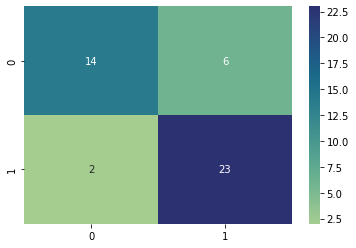

In [31]:
metrics(y_test_labels, predictions_test)

#### Step 6.4 - evaluate the feature importance

#### Step 6.5 - feature selection

### Step 7 - model tuning

#### Step 7.1 - create a pipeline for model tuning

##### Step 7.1.1 - function transformer

##### Step 7.1.2 - column transformer

##### Step 7.1.3 - set up pipeline with estimators

##### Step 7.1.4 - define the hyperparameter grid

##### Step 7.1.5 - set up the grid search CV

#### Step 7.2 - run the tuner model

#### Step 7.3 - evaluate the tuner model

#### Step 7.4 - handle over-/underfitting (e.g. regularization) - if necessary

#### Step 7.5 - optimize the model

### Step 8 - retraining the best model with the whole data set

### Step 9 - pickle the best model